In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from pathlib import Path
import PIL
import PIL.Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [39]:
INDEX_TO_LABEL= {
    0:"angelina",
    1:"brad",
    2:"denzel"
}

### the data stored locally no need to download them 

In [2]:
# Define some constants
IMG_WIDTH = 320
IMG_HEIGHT = 243
BATCH_SIZE = 32

In [4]:
# Load the data directory
data_dir = Path("C:/Users/nasser/.keras/datasets") / 'Celebrity/data'
images = list(data_dir.glob('*'))
images = [image for image in images if not image.name.startswith('.')]
num_images = len(images)
images

[WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_0.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_1.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_2.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_3.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_4.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_5.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_6.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_7.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_8.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/0_9.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/1_0.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/1_1.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/1_2.jpg'),
 WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/1_3

In [5]:
num_images

30

In [6]:
def get_label_from_image_path(img_path):
    img_path = str(img_path)
    return int(img_path.split('\\')[-1].split('_')[0])


In [7]:
images[15]

WindowsPath('C:/Users/nasser/.keras/datasets/Celebrity/data/1_5.jpg')

In [8]:
get_label_from_image_path(images[15])

1

In [9]:
# Prepare the data for training
person_ids = []
images_as_trainable_objects = []
image_bofer_edit =[]
for image_path in images:
    person_id = get_label_from_image_path(image_path)
    # Prepare the image for the CNN
    image = load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    image_bofer_edit.append(image)
    image = img_to_array(image)
    
    image = image.reshape((IMG_WIDTH, IMG_HEIGHT, 3))
    image = tf.keras.applications.vgg16.preprocess_input(image)
    images_as_trainable_objects.append(image)
    person_ids.append(person_id)

In [10]:
person_ids

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [11]:
# Convert the data to numpy arrays
images_as_trainable_objects = np.array(images_as_trainable_objects)
person_ids = tf.keras.utils.to_categorical(person_ids, 3)


In [12]:
# Load the base VGG16 model
base_model = tf.keras.applications.VGG16(weights='imagenet',
                                         include_top=False,
                                         input_tensor=tf.keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
                                         pooling='max',
                                         classes=3)

In [13]:
# Disable training on the convolutional and inner layers
for layer in base_model.layers:
    layer.trainable = False

In [14]:
# Stack a new simple convolutional network on top of the base model
x = base_model.get_layer('block5_pool').output
x = tf.keras.layers.Convolution2D(64, 3)(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

In [15]:
# Create the final model
model = tf.keras.Model(inputs=base_model.input, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 243, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 320, 243, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 320, 243, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 160, 121, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 160, 121, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 160, 121, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 80, 60, 128)       0     

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Train the model
model.fit(images_as_trainable_objects, person_ids, epochs=10, batch_size=BATCH_SIZE)


Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 1.3918 - accuracy: 0.9667
Epoch 2/10
1/1 [==============================] - 0s 158ms/step - loss: 0.3002 - accuracy: 0.9667
Epoch 3/10
1/1 [==============================] - 0s 160ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 157ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 158ms/step - loss: 1.2390e-04 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 166ms/step - loss: 1.5079e-04 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 164ms/step - loss: 0.0430 - accuracy: 0.9667
Epoch 8/10
1/1 [==============================] - 0s 166ms/step - loss: 1.5895e-08 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 167ms/step - loss: 5.9605e-08 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 166ms/step - loss: 9.4174e-07 - accuracy: 1.0000


In [35]:
# load unseen image path : C:\Users\nasser\.keras\datasets\Celebrity\data\unseen.jpg
path_to_unseen_image = Path("C:/Users/nasser/.keras/datasets") / 'Celebrity/data/unseen.jpg'
unseen_image = load_img(path_to_unseen_image, target_size=(IMG_WIDTH, IMG_HEIGHT))    

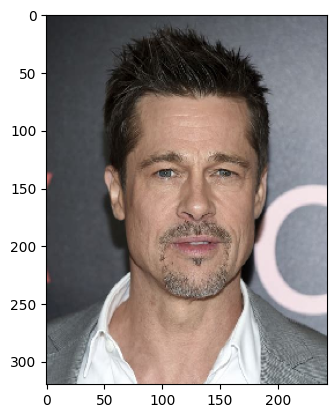

In [36]:
# draw the image
plt.imshow(unseen_image)

In [37]:
# preprocess the image
unseen_image = img_to_array(unseen_image)
unseen_image = unseen_image.reshape((IMG_WIDTH, IMG_HEIGHT, 3))
unseen_image = tf.keras.applications.vgg16.preprocess_input(unseen_image)


In [38]:
# predict the image
unseen_image = unseen_image.reshape((1, *unseen_image.shape))
predictions = model.predict(unseen_image)
predicted_class = np.argmax(predictions)
sparse_predictions = tf.keras.utils.to_categorical(predicted_class, num_classes=3, dtype='int')
sparse_predictions

1/1 [==============================] - 0s 15ms/step


array([0, 1, 0])

In [40]:
INDEX_TO_LABEL[predicted_class]

'brad'